In [89]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import plot_counter
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
df = pd.read_csv("../../data/india-news-headlines.csv")

In [119]:
df.head(5)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,bollywood,Raju Chacha
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
3,20010102,unknown,Fissures in Hurriyat over Pak visit
4,20010102,unknown,America's unwanted heading for India?


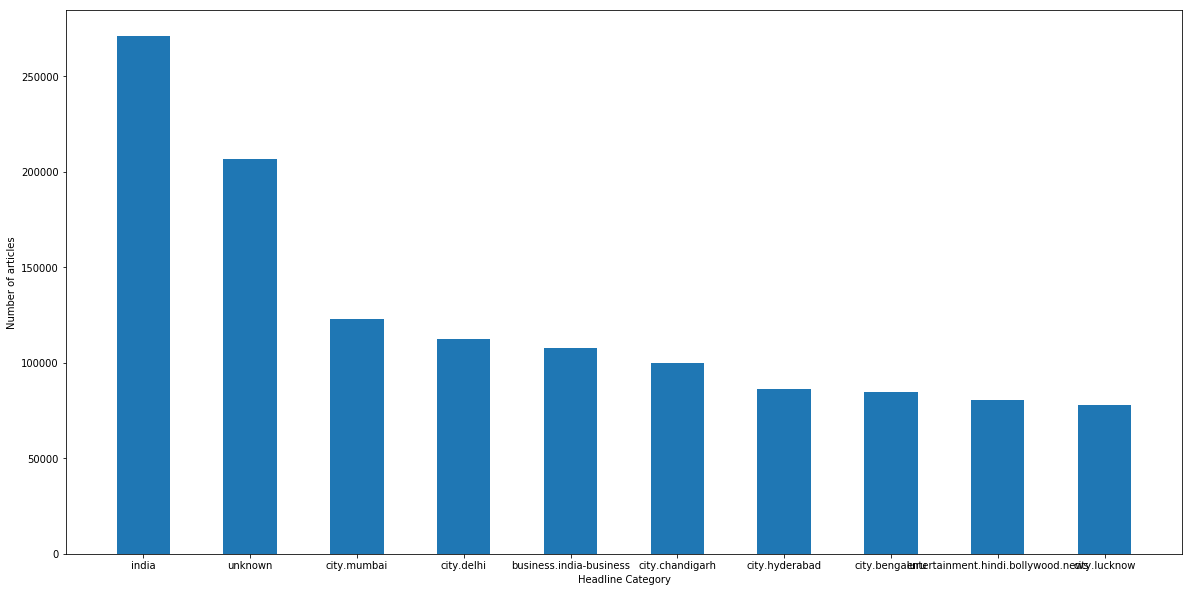

In [92]:
plot_counter(df.headline_category, xlabel="Headline Category",
             ylabel="Number of articles")

In [138]:
df.head(5)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,bollywood,Raju Chacha
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
3,20010102,unknown,Fissures in Hurriyat over Pak visit
4,20010102,unknown,America's unwanted heading for India?


In [139]:
def convert_to_datetime(df):
    """
    Input - A DF to convert df.publish_dates to to_datetime
    Returns - A converted DF
    """
    dates = df.publish_date
    dates = dates.apply(lambda x: str(x))
    dates = pd.to_datetime(dates)
    df.publish_date = dates
    return df


def filter_headlines(df, keywords):
    """
    Input - A DF for filtering headlines based on
            keywords
    Returns - Filtered DF
    """
    assert(keywords != None)
    assert(len(keywords) != 0)

    if isinstance(keywords, str):
        keywords = [keywords]

    resultant_df = pd.DataFrame(df.head(1).copy(deep=True), df.columns)

    # Iteratively apply the filter for each word
    for keyword in keywords:
        temp_df = df[df['headline_text'].str.contains(keyword, na=False)]
        print(keyword, "found in", temp_df.shape[0], "rows")
        resultant_df = resultant_df.append(temp_df.copy(deep=True))

    curr_len = len(resultant_df)
    resultant_df.drop_duplicates(inplace=True)

    print("Dropped", curr_len - len(resultant_df), "duplicate rows")

    return resultant_df

In [146]:
df = convert_to_datetime(df)
filtered_df = filter_headlines(
    df, ['bjp', 'govt', 'government', 'election', 'riot', 'protest', 'unrest'])
print("Current shape:", filtered_df.shape)

bjp found in 150 rows
govt found in 35274 rows
government found in 11661 rows
election found in 12708 rows
riot found in 5056 rows
protest found in 18492 rows
unrest found in 532 rows
Dropped 1457 duplicate rows
Current shape: (82419, 3)


In [147]:
# Get news from 2016 and with city tag
filtered_df = filtered_df[filtered_df.headline_category.str.contains(
    'city', na=False)]
filtered_df = convert_to_datetime(filtered_df)

filtered_df = filtered_df[filtered_df.publish_date.dt.year > 2015]
print("Current shape:", filtered_df.shape)

Current shape: (20298, 3)


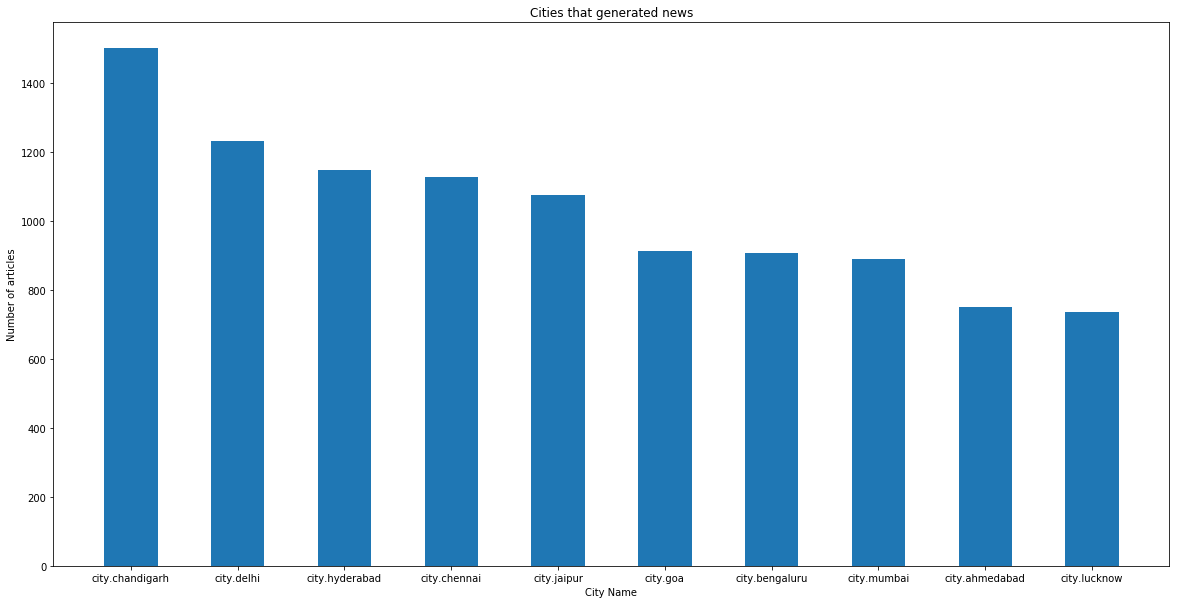

In [153]:
filtered_df.head(5)
filtered_df.sort_values(by="publish_date", inplace=True)

plot_counter(filtered_df.headline_category, title="Cities that generated news",
             xlabel="City Name", ylabel="Number of articles")